<a href="https://colab.research.google.com/github/alexanderchang1/DebateData/blob/master/Copy_of_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Do a scatterplot of the left telencephalon **(type 1 level 1) volume** by the right. The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv) 
2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot. 
3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?
4. Let $X_i$ be a group indicator so that 
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 
5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.
6. Consider the Kirby 21 data. Plot a scatter plot of the left diencephalon (type 1 level 1) and the right. Find the best line fit for predicting the right using the left. Plot the line on the scatterplot. Find the best fit line for predicting the left using the right as a predictor. Plot this on the same plot.
7. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


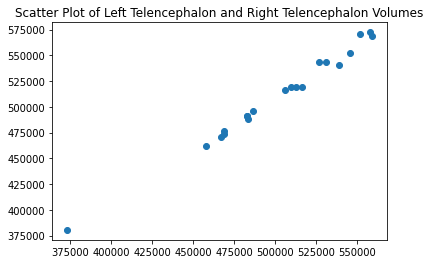

In [1]:
## Question 1 ##
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats as st

pd.set_option('display.max_columns', 999)

df = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv')

left_telencephalon = df[df['roi'] == 'Telencephalon_L']['volume']
right_telencephalon = df[df['roi'] == 'Telencephalon_R']['volume']

plt.figure()
plt.title('Scatter Plot of Left Telencephalon and Right Telencephalon Volumes')
plt.scatter(left_telencephalon, right_telencephalon)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

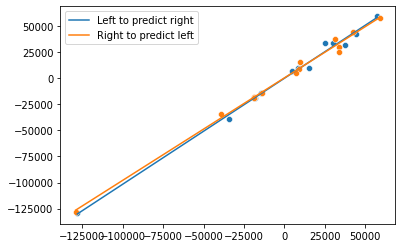

In [2]:
## Question 2 ##
import pylab
np.random.seed(0)
left_vectors = np.asarray(left_telencephalon)
right_vectors = np.asarray(right_telencephalon)

demean_left = pylab.detrend_mean(left_vectors)
demean_right = pylab.detrend_mean(right_vectors)

trainFraction = 0.75

sample = np.random.uniform(size = len(left_vectors)) < trainFraction
xtrain = demean_left[ sample]
ytrain = demean_right[ sample]
xtest =  demean_left[~sample]
ytest =  demean_right[~sample]

beta1 = st.pearsonr(xtrain, ytrain)[0] * np.std(ytrain) / np.std(xtrain)
beta0 = np.mean(ytrain) - np.mean(xtrain) * beta1

sns.scatterplot(xtrain, ytrain)
sns.lineplot(xtrain, beta0 + beta1 * xtrain, label = 'Left to predict right')

xtrain = demean_right[ sample]
ytrain = demean_left[ sample]
xtest = demean_right[~sample]
ytest = demean_left[~sample]

beta1 = st.pearsonr(xtrain, ytrain)[0] * np.std(ytrain) / np.std(xtrain)
beta0 = np.mean(ytrain) - np.mean(xtrain) * beta1

sns.scatterplot(xtrain, ytrain)
sns.lineplot(xtrain, beta0 + beta1 * xtrain, label = 'Right to predict left')

[-172.6740341832646, 0.02533949175030407]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


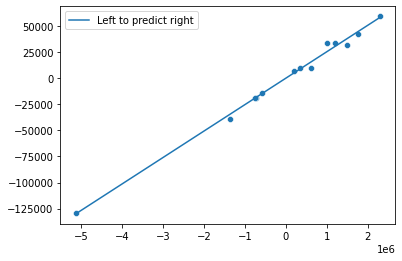

In [3]:
# Question 3
xtrain = demean_left[ sample]
xtrain = 40 * xtrain
ytrain = demean_right[ sample]

beta1 = st.pearsonr(xtrain, ytrain)[0] * np.std(ytrain) / np.std(xtrain)
beta0 = np.mean(ytrain) - np.mean(xtrain) * beta1
print([beta0, beta1])

sns.scatterplot(xtrain, ytrain)
sns.lineplot(xtrain, beta0 + beta1 * xtrain, label = 'Left to predict right')

# If X is replaced by Xc, where c is a positive constant, then the value of B is expected to scale decrease so that the overall coefficient is the same as before the change.

## Question 4 ##
Let $x$ be a vector of $1$s and $0$s and $y$ be a vector with their associated measurements. Then let $n_1$ be the number of $1$s in $x$ and $n_0$ be the number of $0$s in $x$. Let $p_1 = \frac{n_1}{n}$ and $p_0 = \frac{n_0}{n}$, where $n = n_0 + n_1$, and let $\bar{y}_1$ and $\bar{y}_0$ be the means of $y$ in each group. Then we know that: 
$$\bar{x} = \sum_{i=0}^1{x_i \times p(x_i)} =  p_1$$
$$\bar{y} = \sum_{i=0}^1{\bar{y}_i \times p(x_i)} =  p_1\bar{y}_1 + p_0\bar{y}_0$$
$$\sum_{i=1}^n{(x_i - \bar{x})^2} = \sum_{i=1}^n{(x_i - p_1)^2} $$
$$n_0p_1^2 + n_1(1 - 2p_1 + p_1^2) = \frac{n_0n_1(n_1+ n_0)}{(n_1 + n_0)^2} = \frac{n_0}{n_1 + n_0} \times \frac{n_1}{n_1 + n_0} \times n = np_0p_1$$

We want to show that $\hat{\beta_0} = \bar{y}_0$ and that $\hat{\beta_0} + \hat{\beta_1} = \bar{y}_1$. We know $\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$, so we know that $\bar{y}_0 = \bar{y} - \hat{\beta_1}\bar{x}$. Rearranging this equation, we can see that
$$\hat{\beta_1}\bar{x} = \hat{\beta_1}p_1 = p_1\bar{y}_1 + p_0\bar{y}_0 - \bar{y}_0 =
p_1\bar{y}_1 - p_1\bar{y}_0$$
So therefore: 
$$\hat{\beta_1} = \bar{y}_1 - \bar{y}_0$$
If this expression equals $\hat{\beta}_1$ then the problem is solved. Letting $G_1$ and $G_0$ be the indicies for groups $1$ and $0$, we can find that:
$$\hat{\beta_1} = \frac{\sum_{i=1}^n{(y_i - \bar{y})(x_i - p_1)}}{\sum_{i=1}^n{(x_i - p_1)^2}} = \\
\frac{n_1\bar{y}_1p_0 - n_1\bar{y}p_0 - n_0\bar{y}_0p_1 + n_0\bar{y}p_1}{np_1p_0} = \bar{y}_1 - \bar{y}_0$$
The expressions are equal and we know that $\hat{\beta_0} = \bar{y}_0$ and $\hat{\beta_0} + \hat{\beta_1} = \bar{y}_1$. Because $\hat{\beta_0}$ is the y-intercept, the line of best fit will go through $(0, \hat{\beta_0}) = (0, \bar{y}_0)$, and since $\hat{\beta_1}$ is the slope, the line of best fit will go through $(1, \hat{\beta_0} + \hat{\beta_1}) = (1, \bar{y}_1)$. Therefore, $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$.

In [4]:
# Question 5
def betaPrediction(X, Y):
  beta1 = st.pearsonr(X, Y)[0] * np.std(Y) / np.std(X)
  beta0 = np.mean(Y) - np.mean(X) * beta1
  return(beta1, beta0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

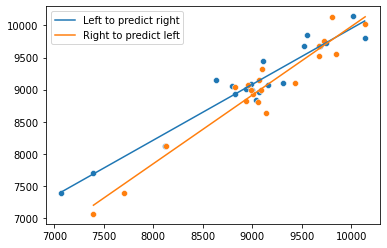

In [7]:
# Question 6
left_diencephalon = df[df['roi'] == 'Diencephalon_L']['volume']
right_diencephalon = df[df['roi'] == 'Diencephalon_R']['volume']

left_vectors = np.asarray(left_diencephalon)
right_vectors = np.asarray(right_diencephalon)

trainFraction = 1

## Hold out data
sample = np.random.uniform(size = len(left_vectors)) < trainFraction
xtrain = left_vectors[ sample]
ytrain = right_vectors[ sample]
xtest =  left_vectors[~sample]
ytest =  right_vectors[~sample]

## get the slope on the training data
beta1 = st.pearsonr(xtrain, ytrain)[0] * np.std(ytrain) / np.std(xtrain)
beta0 = np.mean(ytrain) - np.mean(xtrain) * beta1

sns.scatterplot(xtrain, ytrain)
## add a line
sns.lineplot(xtrain, beta0 + beta1 * xtrain, label = 'Left to predict right')


ytrain = left_vectors[ sample]
xtrain = right_vectors[ sample]
ytest =  left_vectors[~sample]
xtest =  right_vectors[~sample]

## get the slope on the training data
beta1 = st.pearsonr(xtrain, ytrain)[0] * np.std(ytrain) / np.std(xtrain)
beta0 = np.mean(ytrain) - np.mean(xtrain) * beta1

sns.scatterplot(xtrain, ytrain)
## add a line
sns.lineplot(xtrain, beta0 + beta1 * xtrain, label = 'Right to predict left')

##Question 7##
Using the formula for $\hat{\beta_1}$, we know that:
$$\hat{\beta_1} = Corr\left(\frac{X}{\sigma_X}, \frac{Y}{\sigma_Y}\right) \times \frac{\sigma_{\frac{X}{\sigma_X}}}{\sigma_{\frac{Y}{\sigma_Y}}}$$
We can prove that $\sigma_{\frac{X}{\sigma_X}} = \sigma_{\frac{Y}{\sigma_Y}} = 1$. with the properties of variance:
$$\sigma_{\frac{X}{\sigma_X}} = \sqrt{Var\left(\frac{X}{\sigma_X}\right)} = \sqrt{\frac{1}{\sigma_X^2}Var(X)} = \sqrt{\frac{\sigma_X^2}{\sigma_X^2}} = \sqrt{1} = 1$$
The same argument can be applied to $\sigma_{\frac{Y}{\sigma_Y}}$. With this and the definition of correlation, we can write that:
$$\hat{\beta_1} = Corr\left(\frac{X}{\sigma_X}, \frac{Y}{\sigma_Y}\right) \times 1 = \frac{Cov\left(\frac{X}{\sigma_X}, \frac{Y}{\sigma_Y}\right)}{\sigma_{\frac{X}{\sigma_X}} \times \sigma_{\frac{Y}{\sigma_Y}}} = \frac{Cov\left(\frac{X}{\sigma_X}, \frac{Y}{\sigma_Y}\right)}{1} = Cov\left(\frac{X}{\sigma_X}, \frac{Y}{\sigma_Y}\right)$$
With the properties of covariance and the definition of correlation, we can rewrite this as:
$$\frac{1}{\sigma_X}\frac{1}{\sigma_Y}Cov(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} = Corr(X, Y)$$